# Telecommunication Customer Churn Classification Model

## Import Modules,Libraries, and Packages

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV         
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as ltb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Installed xgboost package
!pip install xgboost

In [ ]:
#Installed lightgbm package
!pip install lightgbm

## Import Churn Dataset

In [80]:
#Import dataset from PC
churn_data = pd.read_csv(r"C:\Users\Olusegun\Desktop\hamoyeInternship\Classification\Telco-Customer-Churn.csv")
#Display first 5 rows of the churn dataset
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 1. Preprocessing

## 1.1 Data Wrangling

In [81]:
#Display dataset features, data types and possible missing values
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

##### Observation
The dataset has 21 columns. None of the column has missing value.
The dataset has string(object) and numeric(integer and float) data types.
TotalCharges Column has an object datatype but we will convert it to float data type becuase its contents are float.
The target feature Churn has object datatype, we shall convert it to integer.

In [82]:
#Perform initial data preparation by converting the 'TotalCharges' column to numeric values 
churn_data["TotalCharges"] = pd.to_numeric(churn_data["TotalCharges"], errors='coerce')

In [83]:
#filling missing values of "TotalCharges" with 0.
churn_data["TotalCharges"] = churn_data["TotalCharges"].fillna(0)

In [84]:
#check if TotalCharges column has been converted to float
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [85]:
#Convert the 'Churn' column to binary values, where 'No' is mapped to 0 and 'Yes' is mapped to 1.
churn_data["Churn"] = churn_data["Churn"].replace("No" , 0).replace("Yes" , 1)
#Convert churn data to integer.
churn_data["Churn"] = pd.to_numeric(churn_data["Churn"], errors='coerce')

In [86]:
#check if Churn column has been mapped as "Yes" = 1 and "No" = 0
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [87]:
#check if Churn column has been converted to numeric
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(3), obj

In [88]:
#Extract only the categorical variables from the dataframe
churn_data.select_dtypes("object").head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [89]:
#checking the number of categories in each of the categorical variables
churn_data.select_dtypes("object").nunique()

customerID          7043
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
dtype: int64

##### Observation
There are lots of categorical variables in our dataset.
CustomerID has too many catogories that can result in high dimensional features. We shall drop it

In [90]:
#Dropping very high cardinality categorical feature 
churn_data= churn_data.drop(["customerID"], axis=1)
churn_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [91]:
churn_data.shape

(7043, 20)

In [92]:
#Extract only the numeric variables from the dataframe
churn_data.select_dtypes("number").head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1


In [93]:
#Decribe numeric features
churn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80
Churn,7043.0,0.265370,0.441561,0.00,0.00,0.00,1.00,1.00


##### Observation
There are few numeric variables in our dataset.

## Feature engineering

In [94]:
# Create dummy variables for categorical variables in train dataset
def cat_to_dummy (data, column_name):
    churn_data_cat = pd.get_dummies(data[column_name], drop_first=True)
    data = pd.concat([data, churn_data_cat], axis=1)
    data.drop(column_name, axis = 1, inplace = True)
    return data 

In [95]:
churn_data = cat_to_dummy (churn_data, 'gender')

In [96]:
churn_data = cat_to_dummy (churn_data, 'Partner')

In [97]:
churn_data = cat_to_dummy (churn_data, 'Dependents')

In [98]:
churn_data = cat_to_dummy (churn_data, 'PhoneService')

In [99]:
churn_data = cat_to_dummy (churn_data, 'MultipleLines')

In [100]:
churn_data = cat_to_dummy (churn_data, 'InternetService')

In [101]:
churn_data = cat_to_dummy (churn_data, 'OnlineSecurity')

In [102]:
churn_data = cat_to_dummy (churn_data, 'OnlineBackup')

In [103]:
churn_data = cat_to_dummy (churn_data, 'DeviceProtection')

In [104]:
churn_data = cat_to_dummy (churn_data, 'TechSupport')

In [105]:
churn_data = cat_to_dummy (churn_data, 'StreamingTV')

In [106]:
churn_data = cat_to_dummy (churn_data, 'StreamingMovies')

In [107]:
churn_data = cat_to_dummy (churn_data, 'Contract')

In [108]:
churn_data = cat_to_dummy (churn_data, 'PaperlessBilling')

In [109]:
churn_data = cat_to_dummy (churn_data, 'PaymentMethod')

In [110]:
churn_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Male,Yes,Yes,Yes,No phone service,...,No internet service,Yes,No internet service,Yes,One year,Two year,Yes,Credit card (automatic),Electronic check,Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [111]:
churn_data.shape

(7043, 31)

In [112]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
SeniorCitizen              7043 non-null int64
tenure                     7043 non-null int64
MonthlyCharges             7043 non-null float64
TotalCharges               7043 non-null float64
Churn                      7043 non-null int64
Male                       7043 non-null uint8
Yes                        7043 non-null uint8
Yes                        7043 non-null uint8
Yes                        7043 non-null uint8
No phone service           7043 non-null uint8
Yes                        7043 non-null uint8
Fiber optic                7043 non-null uint8
No                         7043 non-null uint8
No internet service        7043 non-null uint8
Yes                        7043 non-null uint8
No internet service        7043 non-null uint8
Yes                        7043 non-null uint8
No internet service        7043 non-null uint8
Yes                        7043 non-null ui

In [113]:
#Split the data into an 80-20 train-test split with a random state of “1”
X = churn_data.drop(columns = "Churn").values
y = churn_data["Churn"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 1)

In [114]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

# Modelling

In [64]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

[20:45:48] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "force_row_wise" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:45:49] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "force_row_wise" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:45:50] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "force_row_wise" } might not be used.


[LightGBM] [Info] Number of positive: 1369, number of negative: 3702
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 5071, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.269966 -> initscore=-0.994793
[LightGBM] [Info] Start training from score -0.994793


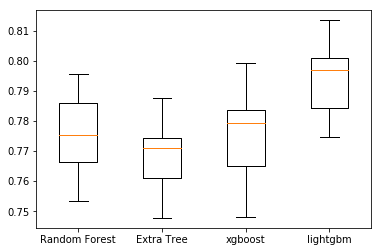

In [115]:
#Train random forest,extra trees classifier,xgboost, and lightgbm with no hyperparameter tuning
models = {"Random Forest": RandomForestClassifier(), "Extra Tree":  ExtraTreesClassifier(), "xgboost":XGBClassifier(force_row_wise=True),
         "lightgbm": LGBMClassifier()}

results = []

for model in models.values():
  skf = StratifiedKFold(n_splits=10, shuffle= True, random_state= 1)
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=skf)

  results.append(cv_results)

plt.boxplot(results, labels= models.keys())
plt.show()

In [116]:
#Train Set Performance of out of the box models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    train_score = model.score(X_train_scaled, y_train)
    print("{} Train Set Score: {}".format(name, train_score))

Random Forest Train Set Score: 0.981008164714235
Extra Tree Train Set Score: 0.9980475683351083
[20:46:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "force_row_wise" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


xgboost Train Set Score: 0.9345047923322684
[LightGBM] [Info] Number of positive: 1521, number of negative: 4113
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 30
[LightGBM] [Info]

# Model Evaluation

In [117]:
#Test Set Performance of out of the box models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    test_score = model.score(X_test_scaled, y_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("{} Test Set Score: {}".format(name, test_score), "{} Accuracy Score: {}".format(name, accuracy))

Random Forest Test Set Score: 0.7927608232789212 Random Forest Accuracy Score: 0.7927608232789212
Extra Tree Test Set Score: 0.7778566359119943 Extra Tree Accuracy Score: 0.7778566359119943
[20:46:53] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "force_row_wise" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


xgboost Test Set Score: 0.801277501774308 xgboost Accuracy Score: 0.801277501774308
[LightGBM] [Info] Number of positive: 1521, number of negative: 4113
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGB